# Assignment 3

In [103]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

## Downloading and Loading the dataset

In [104]:
dataset = pd.read_csv('penguins_size.csv')

## Univariate Analysis

/var/folders/jt/_7sj1xh12p54l04ct34sl3040000gn/T/ipykernel_21895/3318738181.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset['culmen_length_mm'])


<Axes: xlabel='culmen_length_mm', ylabel='Density'>

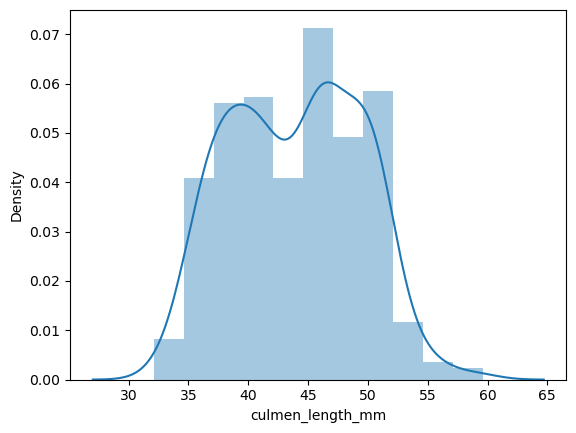

In [105]:
sns.distplot(dataset['culmen_length_mm'])

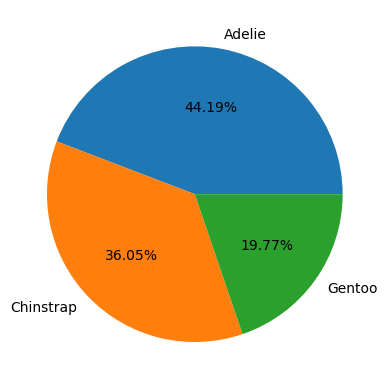

In [106]:
plt.pie(dataset['species'].value_counts(), labels=dataset['species'].unique(), autopct='%.2f%%')
plt.show()

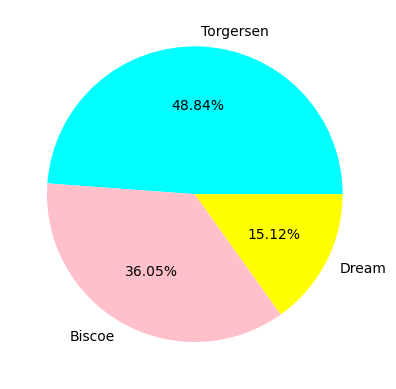

In [107]:
plt.pie(dataset['island'].value_counts(), labels=dataset['island'].unique(), autopct='%.2f%%', colors=['aqua', 'pink', 'yellow'])
plt.show()

## Bivariate Analysis

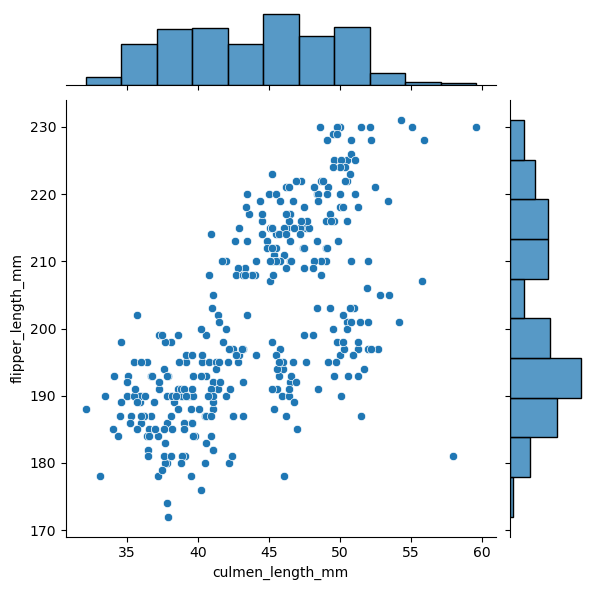

In [108]:
sns.jointplot(x = dataset['culmen_length_mm'], y = dataset['flipper_length_mm'])

## Multivariate Analysis

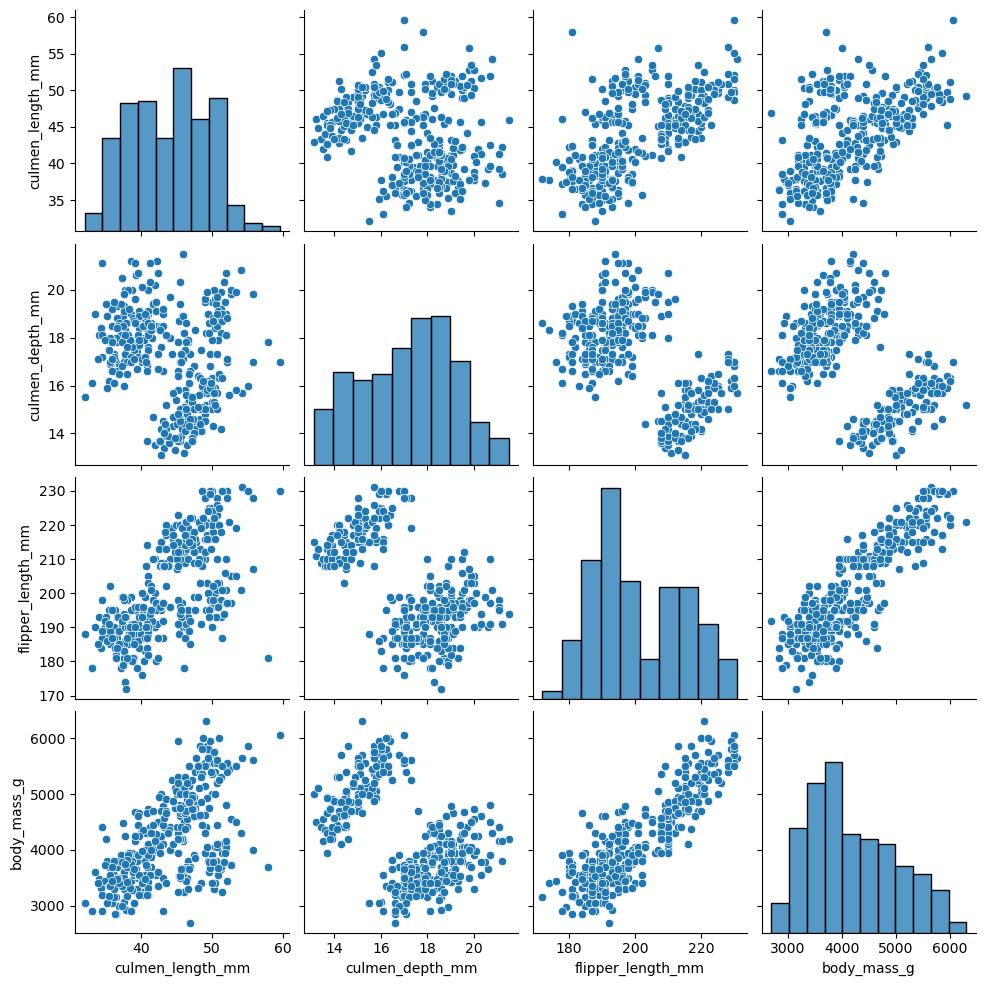

In [109]:
sns.pairplot(dataset)

## descriptive statistics on the dataset

In [110]:
dataset.describe()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


##  Check for Missing values and deal with them

In [111]:
dataset.isnull().any()

species              False
island               False
culmen_length_mm      True
culmen_depth_mm       True
flipper_length_mm     True
body_mass_g           True
sex                   True
dtype: bool

In [112]:
dataset['culmen_length_mm'].fillna(dataset['culmen_length_mm'].mean(), inplace=True)
dataset['culmen_depth_mm'].fillna(dataset['culmen_depth_mm'].mean(), inplace=True)
dataset['flipper_length_mm'].fillna(dataset['flipper_length_mm'].mean(), inplace=True)
dataset['body_mass_g'].fillna(dataset['body_mass_g'].mean(), inplace=True)
dataset['sex'].fillna(dataset['sex'].mode().iloc[0], inplace=True)

In [113]:
dataset.isnull().any()

species              False
island               False
culmen_length_mm     False
culmen_depth_mm      False
flipper_length_mm    False
body_mass_g          False
sex                  False
dtype: bool

## Find the outliers and replace them outliers

<Axes: >

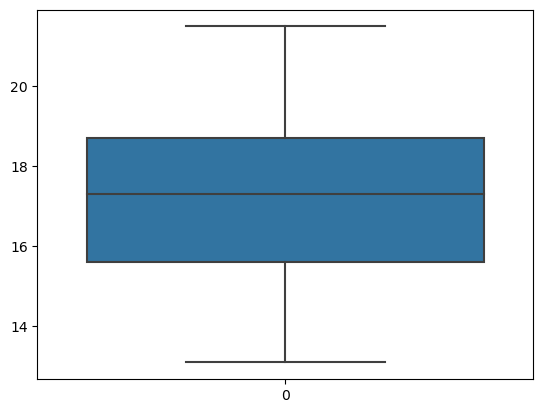

In [114]:
sns.boxplot(dataset['culmen_depth_mm'])

<Axes: >

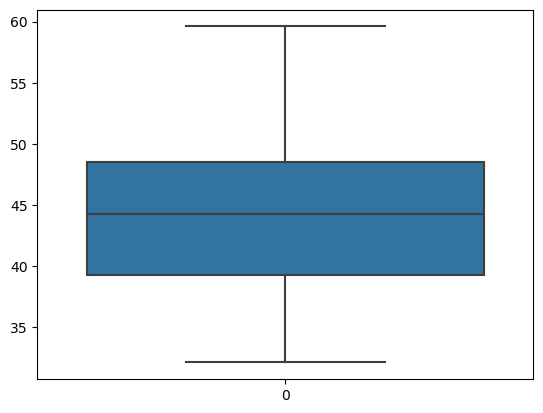

In [115]:
sns.boxplot(dataset['culmen_length_mm'])

<Axes: >

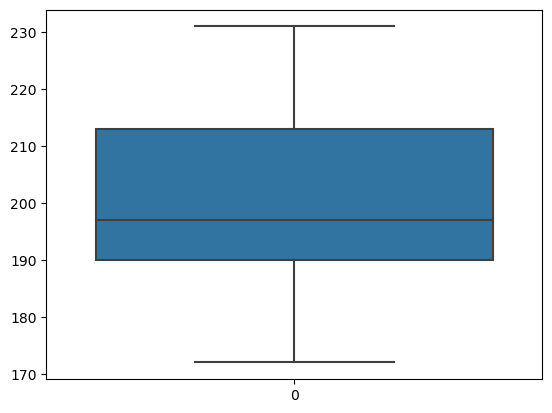

In [116]:
sns.boxplot(dataset['flipper_length_mm'])

<Axes: >

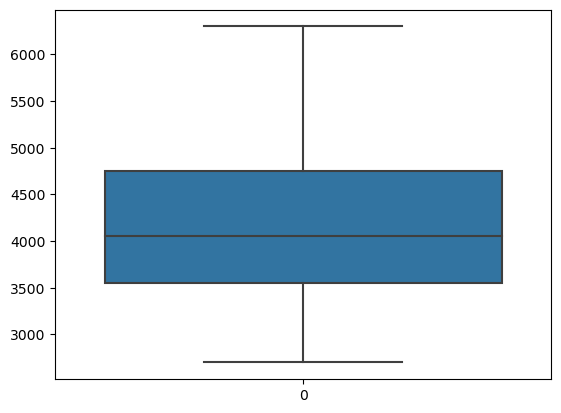

In [117]:
sns.boxplot(dataset['body_mass_g'])

## Check for Categorical columns and perform encoding

In [118]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   344 non-null    float64
 3   culmen_depth_mm    344 non-null    float64
 4   flipper_length_mm  344 non-null    float64
 5   body_mass_g        344 non-null    float64
 6   sex                344 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [119]:
le = LabelEncoder()
dataset['species'] = le.fit_transform(dataset['species'])
dataset['sex'] = le.fit_transform(dataset['sex'])
dataset['island'] = le.fit_transform(dataset['island'])
dataset

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,0,2,39.10000,18.70000,181.000000,3750.000000,2
1,0,2,39.50000,17.40000,186.000000,3800.000000,1
2,0,2,40.30000,18.00000,195.000000,3250.000000,1
3,0,2,43.92193,17.15117,200.915205,4201.754386,2
4,0,2,36.70000,19.30000,193.000000,3450.000000,1
...,...,...,...,...,...,...,...
339,2,0,43.92193,17.15117,200.915205,4201.754386,2
340,2,0,46.80000,14.30000,215.000000,4850.000000,1
341,2,0,50.40000,15.70000,222.000000,5750.000000,2
342,2,0,45.20000,14.80000,212.000000,5200.000000,1


## Check the correlation of independent variables with the target

In [120]:
dataset.corr().species.sort_values(ascending=False)

species              1.000000
flipper_length_mm    0.851160
body_mass_g          0.747726
culmen_length_mm     0.728674
sex                 -0.003823
island              -0.635659
culmen_depth_mm     -0.741335
Name: species, dtype: float64

## Split the data into dependent and independent variables

In [121]:
X = dataset.iloc[:, 1:]
X

,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,2,39.10000,18.70000,181.000000,3750.000000,2
1,2,39.50000,17.40000,186.000000,3800.000000,1
2,2,40.30000,18.00000,195.000000,3250.000000,1
3,2,43.92193,17.15117,200.915205,4201.754386,2
4,2,36.70000,19.30000,193.000000,3450.000000,1
...,...,...,...,...,...,...
339,0,43.92193,17.15117,200.915205,4201.754386,2
340,0,46.80000,14.30000,215.000000,4850.000000,1
341,0,50.40000,15.70000,222.000000,5750.000000,2
342,0,45.20000,14.80000,212.000000,5200.000000,1


In [122]:
y = dataset.iloc[:, 0]
y

0      0
1      0
2      0
3      0
4      0
      ..
339    2
340    2
341    2
342    2
343    2
Name: species, Length: 344, dtype: int64

## Split into train and test set

In [123]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

## Check the training and testing data shape

In [124]:
X_train.shape

(275, 6)

In [125]:
X_test.shape

(69, 6)

In [126]:
y_train.shape

(275,)

In [127]:
y_test.shape

(69,)

## Scaling the data

In [128]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [129]:
print(X_train)

[[-0.9155022   0.43104246 -1.11351925  1.12933874  0.63527279 -1.04844487]
 [ 0.45277554  1.76787382  1.35678271  0.32346164  0.38258149  0.9537936 ]
 [ 0.45277554 -1.13173224  0.19725322 -0.99524634 -0.97563427 -1.04844487]
 ...
 [ 0.45277554  1.01472939  0.90305378 -0.04284613 -0.50183808  0.9537936 ]
 [ 1.82105329 -0.94344613  0.7518108  -1.43481567 -0.56501091  0.9537936 ]
 [ 0.45277554 -0.92461752  0.70139648 -0.77546168  0.06671736  0.9537936 ]]


In [130]:
print(X_test)

[[ 1.94238094 -0.62768113  0.25469515 -1.06460223 -0.50875885 -0.90623781]
 [ 0.51659068 -0.86715189  0.89374842 -0.80225382 -0.62991281 -0.90623781]
 [ 0.51659068  1.03150915  0.68073066 -0.47431831  0.21816492  0.98862307]
 [-0.90919959 -0.16584466  1.37303838 -0.34314411  0.06672247  0.98862307]
 [ 0.51659068 -0.38821036 -0.17134037 -0.99901513 -1.23568262 -0.90623781]
 [-0.90919959  0.51835752 -1.50270136  0.96859792  0.18787643 -0.90623781]
 [-0.90919959  0.51835752 -1.07666584  1.23094633  1.30855058  0.98862307]
 [ 0.51659068 -1.72240461 -0.43761257 -1.58929904 -1.5991445  -0.90623781]
 [ 1.94238094 -1.46582879  2.22510941 -0.27755701  0.21816492  0.98862307]
 [-0.90919959  1.39071529 -1.44944692  1.03418502  1.30855058  0.98862307]
 [-0.90919959  1.16834958 -0.54412145  1.42770763  1.36912756  0.98862307]
 [-0.90919959  0.56967268 -1.822228    0.50948821  0.39989587 -0.90623781]
 [ 0.51659068  0.84335355 -0.27784925 -0.21196991 -1.08424017 -0.90623781]
 [-0.90919959  0.70651312

# Trying SVC...

## Training and predicting

In [131]:
classifier = LogisticRegression()
classifier.fit(X_train, y_train)

LogisticRegression()

In [132]:
y_pred = classifier.predict(X_test)

In [133]:
print(pd.DataFrame({"Actual" : y_test, "Pred" : y_pred}))

     Actual  Pred
1         0     0
96        0     0
171       1     1
113       0     0
182       1     0
..      ...   ...
164       1     1
178       1     1
314       2     2
298       2     2
322       2     2

[69 rows x 2 columns]


## Accuracy

In [134]:
confusion_matrix(y_test, y_pred)

array([[31,  0,  0],
       [ 1, 10,  0],
       [ 0,  0, 27]])

In [135]:
accuracy_score(y_true=y_test, y_pred=y_pred)

0.9855072463768116

In [136]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    int64  
 1   island             344 non-null    int64  
 2   culmen_length_mm   344 non-null    float64
 3   culmen_depth_mm    344 non-null    float64
 4   flipper_length_mm  344 non-null    float64
 5   body_mass_g        344 non-null    float64
 6   sex                344 non-null    int64  
dtypes: float64(4), int64(3)
memory usage: 18.9 KB
